**Universidad de Monterrey**

Isis Ramos Calvillo

Ingenieria Mecatronica (IMT)

Profesor: Andrés Hernández Gutiérrez

Monterrey Nuevo León, 29 Agosto 2024


**INTRODUCCIÓN**

En este código se mostrara cómo construir, entrenar y evaluar un modelo de regresión lineal utilizando datos sintéticos. Se generan datos sintéticos
 con una relación lineal conocida, estos datos para entender su distribución
 y la relación que se modelará se dividen en conjuntos de entrenamiento y prueba para asegurar que el modelo pueda generalizar correctamente a
 nuevos datos.
Usando en especifico TensorFlow, un modelo de regresión lineal simple,
 que se entrena para aprender la relación entre la entrada y la salida.
 Este enfoque permite entender los fundamentos de los modelos de
  regresión lineal y cómo aplicarlos utilizando herramientas
  modernas de aprendizaje automático.

Importaremos las librerias necesarias para que se puedan utilizar los diversos comandos,como lo seran:

- Numpy (np): Manejo de arreglos numéricos y generación de números aleatorios.

- Pandas (pd): Manipulación de datos (no se usa directamente en este código).

- TensorFlow (tf): Creación y entrenamiento del modelo de aprendizaje automático.

- Matplotlib.pyplot (plt): Creación de gráficos para visualizar datos y resultados.

- train_test_split: División de datos en conjuntos de entrenamiento y prueba para evaluar el modelo

 `Usar librerías conocidas y respetadas asegura que tu código sea comprensible y utilizable por otros que estén familiarizados.`

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**Generación de Datos Sintéticos**

Crea un conjunto de datos que simulan una relación lineal con ruido aleatorio,usando de una semilla fija para asegurar que los resultados sean consistentes en cada ejecución.

Cuando queremos probar un modelo de aprendizaje automático o un algoritmo, no tenemos datos reales disponibles. Para solucionar esto, generamos datos sintéticos, que son datos creados artificialmente para simular un escenario real.

In [2]:
def generate_data(true_coeffs=np.array ( [10, 1]), noise_std=2, num_samples=100):
    # Seed for reproducibility
    np. random. seed (4500)
    # Generate synthetic data
    x = np. arange(0,100, 1)
    y = true_coeffs[0] + true_coeffs[1]*x + np. random.normal (loc=0.0, scale=noise_std, size=num_samples)
    # Return features and response
    return (x, y)
 # Generate a synthetic dataset for simple linear regression
true_coeffs = np.array ([10, 1])
noise_std = 5
x, y = generate_data(true_coeffs=true_coeffs, noise_std=noise_std, num_samples=100)

**Visualización de Datos**

Muestra la relación entre **X** e **Y** para validar que los datos generados siguen el patrón esperado (lineal con ruido).

In [3]:
# Visualise the generated synthetica dataset
plt.figure(figsize=(10,7))
plt.scatter(x, y, label='Synthetic dataset' )
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel ("$f_{\mathbf {w}}(x)$", fontsize=20)
plt.title(rf"$f_{{f\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\tepsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$",
    fontsize=20)
plt.legend ()
plt.show( )

ValueError: 
\tepsilon \sim \mathcal{N}(\mu=0, \sigma=5)
^
ParseFatalException: Expected token, found '\'  (at char 0), (line:1, col:1)

<Figure size 1000x700 with 1 Axes>

**División de Datos en Entrenamiento y Prueba**

Ahora nos toca, dividir los datos, aseguran que el modelo se pruebe en datos no vistos, lo cual es crucial para evaluar su capacidad de generalización. Entrenar y probar en conjuntos separados ayuda a evitar que el modelo memorice los datos de entrenamiento.

Esta práctica es un estándar en el aprendizaje automático y la ciencia de datos, asegurando que los modelos desarrollados sean robustos y confiables

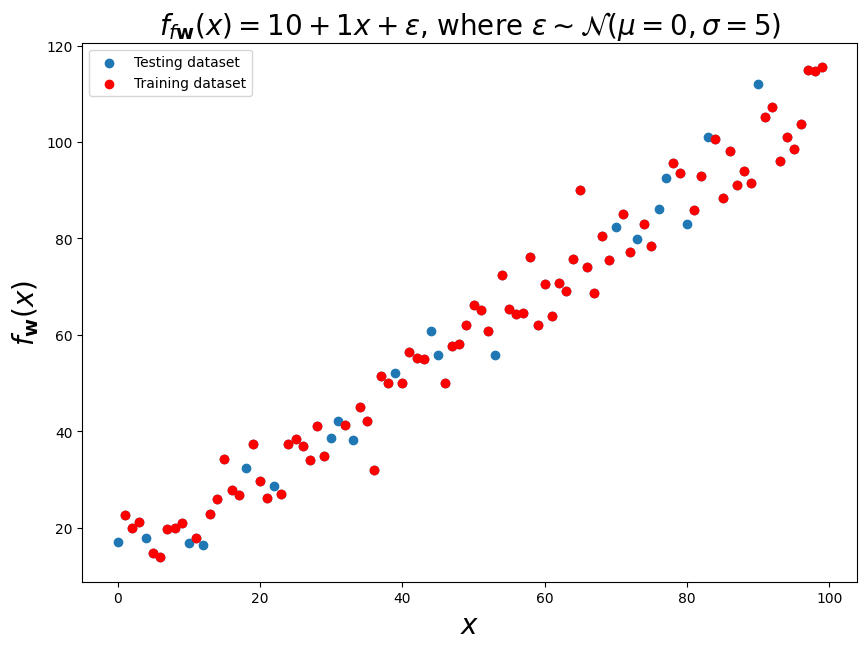

In [4]:
# Split the data into training and testing sets using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

# Visualise the generated synthetica dataset
plt. figure(figsize=(10,7))
plt.scatter(x, y, label='Testing dataset' )
plt.scatter(x_train, y_train, label='Training dataset', color=[1,0,0])
plt.xlabel(r"$x$", fontsize=20)
plt. ylabel ("$f_{\mathbf {w}}(x)$", fontsize=20)
plt.title(rf"$f_{{f\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon \sim \mathcal{{N}} (\mu=0, \sigma={noise_std})$",
    fontsize=20)
plt. legend ( )
plt. show()

**Construcción y Entrenamiento del Modelo de Regresión Lineal**

Un modelo de regresión lineal básico con una entrada y una salida.
 La regresión lineal es ideal para situaciones donde hay una relación lineal     (o casi lineal) entre las entradas y salidas, como en este caso los datos sintéticos que generamos.

 Al dividir los datos y utilizar un conjunto de validación, el código te permite monitorear cómo se está entrenando el modelo y ajustar hiperparámetros.

In [5]:

# Build the linear regression model using a multiple-input single neuron
model = tf. keras.Sequential([
    tf.keras.layers.Input (shape=(1,)),
    tf.keras.layers.Dense (1)
])
# Compile the model
model. compile(optimizer='adam', loss='mse' )

model. summary ( )

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

**Entrenamiento y Evaluación del Modelo**

Dentro del entrenamiento se realizan ajuste de los pesos del modelo usando el conjunto de entrenamiento.
Al igual que la validación permite un monitoreo del rendimiento durante el entrenamiento para evitar sobreajuste.

In [6]:
# Train the model
model. fit(x_train, y_train, epochs=500, batch_size=10, validation_split=0.10, verbose=1)
# Evaluate the model
loss = model. evaluate(x_test, y_test)
print(f'\nTest Loss: {loss}')

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 5717.6318 - val_loss: 8161.0566
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 5682.9873 - val_loss: 8067.2964
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5901.4604 - val_loss: 7973.8506
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5710.3213 - val_loss: 7881.9668
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 5816.4653 - val_loss: 7790.9800
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 5596.9438 - val_loss: 7703.4092
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 5951.3643 - val_loss: 7614.2158
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5816.4087 - val_loss: 7527.3770
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6097.8779 - val_loss: 7442.0654
Epoch 10/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4990.6030 - val_loss: 7361.9219
Epoch 11/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5642.1724 - val_loss: 7275.4111
Epoch 12

**Obtención de Pesos y Predicciones**

Los pesos determinan la importancia de cada característica (entrada) en la predicción del resultado. Esta parte permite entender cómo el modelo está tomando decisiones.

La predicción es el objetivo principal de construir un modelo de aprendizaje automático. Hacer predicciones en un conjunto de prueba permite evaluar qué tan bien generaliza el modelo a datos que no fueron usados durante el entrenamiento.

In [7]:
# Print the weights of the trained model
weights = model.layers[0].get_weights()
print (f"Weights [w1]: {weights[0]}")
print(f"Biases [w0]: {weights [1]}")

# Make predictions
y_pred = model. predict(x_test)

# Make predictions
y_pred_train = model. predict(x_train)

Weights [w1]: [[1.1209978]]
Biases [w0]: [1.7395315]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


**Visualización de Resultados**

Finalmente,comparar las predicciones del modelo con los datos reales para evaluar visualmente el ajuste y la precisión del modelo.

Esto ayuda a interpretar y presentar los resultados del modelo de manera clara y comprensible.

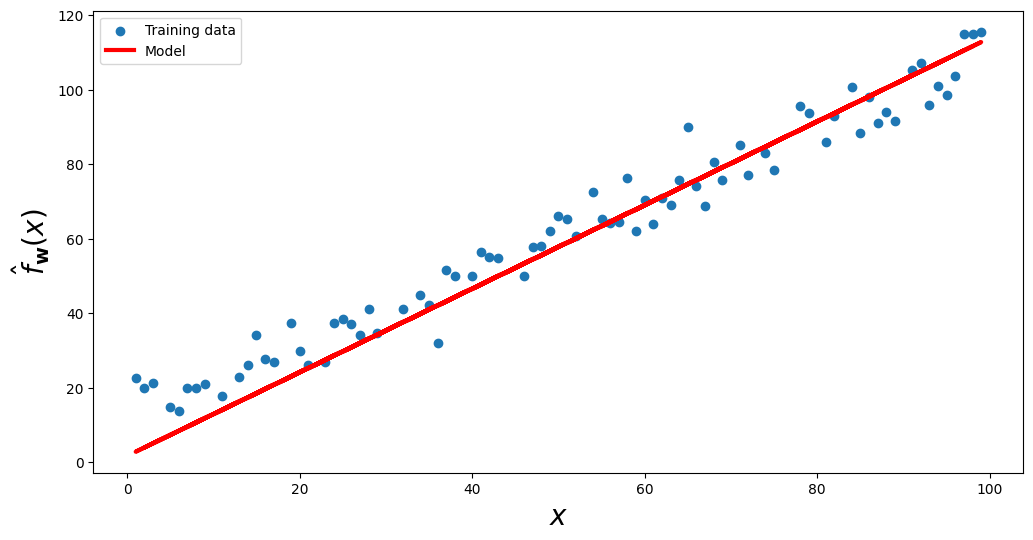

In [8]:

# Plot the results
plt. figure(figsize=(12, 6))
plt.scatter(x_train, y_train, label='Training data')
plt.plot(x_train, y_pred_train, label='Model', linewidth=3, color=[1,0,0])
plt.xlabel (r'$x$', fontsize=20)
plt. ylabel("$\hat{f}_{\mathbf{w}}(x)$", fontsize=20)
plt. legend ();

**CONCLUSIÓN**

 Al analizar y trabajar con este código, he aprendido los conceptos fundamentales del aprendizaje automático y su aplicación práctica en la creación de modelos predictivos. Este ejercicio me ha permitido comprender la importancia de cada etapa del proceso: desde la generación y visualización de datos sintéticos, hasta para que problemas del mundo real hay,los datos en conjuntos de entrenamiento y prueba fueron algo que investigue más afondo, lo cual es esencial para evaluar la capacidad del modelo de generalizar a nuevos datos.

He aprendido cómo construir un modelo de regresión lineal utilizando TensorFlow, cómo entrenarlo para aprender relaciones entre variables, y la importancia de ajustar los parámetros del modelo para minimizar el error. Y con base a es el obtener y analizar los pesos del modelo, y ya de mejor manera comprendí cómo interpretar los resultados y evaluar el rendimiento de un modelo entrenado.
